# Similarity Between Images
> Similarity Between Images - Mean Squared Error (MSE) and  Structural Similarity Index (SSIM)

- toc: true 
- badges: true
- comments: true
- categories: [Image Processing, Computer Vision]
- image: images/chart-preview.png

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import metrics

## 1. Load images

In [157]:
original_path = "images/calculator_original.jpg"
contrast_path = "images/calculator_contrast.jpg"
erased_path   = "images/calculator_erased.jpg"
failed_path   = "images/calculator_failed.jpg"

In [164]:
img_original = cv2.imread(original_path)
img_contrast = cv2.imread(contrast_path)
img_erased   = cv2.imread(erased_path)
img_failed   = cv2.imread(failed_path)

img_original = cv2.cvtColor(img_original,cv2.COLOR_BGR2RGB)
img_contrast = cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB)
img_erased   = cv2.cvtColor(img_erased, cv2.COLOR_BGR2RGB)
img_failed   = cv2.cvtColor(img_failed, cv2.COLOR_BGR2RGB)

In [ ]:
#collapse-show
#fig = plt.figure(figsize = (15, 15))
#ax1 = fig.add_subplot(131)# 1row + 3cols
#ax1 = ax1.imshow(img_original)
#plt.colorbar(ax1)
#ax2 = fig.add_subplot(132)
#ax2 = ax2.imshow(img_contrast)
#plt.colorbar(ax2)
#ax3 = fig.add_subplot(133)
#ax3 = ax3.imshow(img_erased)
#plt.colorbar(ax3)

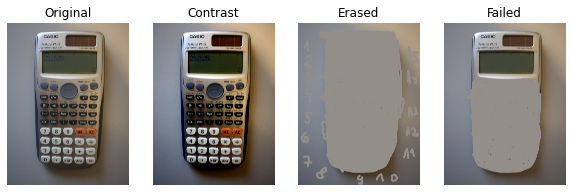

In [165]:
fig = plt.figure(figsize = (10,10))
images = ("Original", img_original), ("Contrast", img_contrast), ("Erased", img_erased), ("Failed", img_failed)
# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 4, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

## 2. Compute MSE and SSI 

In [162]:
def mse_img(imgA, imgB):
    # img_orig = original image
    # img = image that we want to compare against
    shape = imgA.shape # image shape (height, width, channels)
    acc = 0 # squared differences of all channels = 0
    for i in range(shape[2]): # loop over channels in an img - RGB
        # calculate the squared differences for each channel in img
        squared_diff = np.square(imgA[:, :, i] - imgB[:, :, i])
        # add squared differences of all channels
        # this res will be a matrix with same width x height as the original image, but with 1 channel
        acc = acc + squared_diff   
        #compute the sum of diferences and divide by number of pixels x no of channels
    return np.sum(acc)/(shape[0] * shape[1]*shape[2]) 

def ssi_img(imgA, imgB):
    return metrics.structural_similarity(imgA, imgB, multichannel = True)

In [145]:
def compare_images(imageA, imageB, title):
    mse = mse_img(imageA, imageB)
    ssi = ssi_img(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (mse, ssi))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

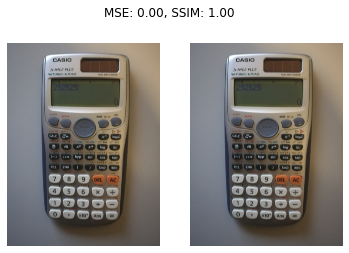

In [167]:
compare_images(img_original, img_original, "Original vs. Original")

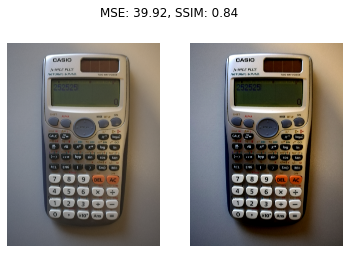

In [147]:
compare_images(img_original, img_contrast, "Original vs. Contrast")

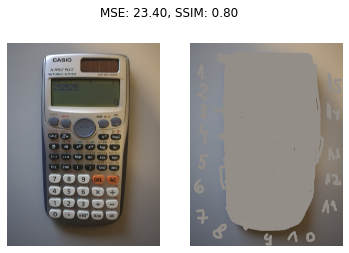

In [148]:
compare_images(img_original, img_erased, "Original vs. Erased")

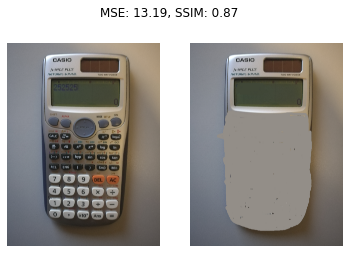

In [166]:
compare_images(img_original, img_failed, "Original vs. Failed")

## References:

>https  https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/